In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("../incl/")


import narrom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# trajectories = trajectories[::10]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


In [27]:
import random

n_train_traj = [10,20,50,100,200,500,1000]
# n_train_traj = [10]

scores_list = []

for n in n_train_traj:
    
    print('training set size:', n)
    
    batches = n_trajectories//n
    
    print('number of batches:', batches)
    
    tmp_scores = []
    
    for b in range(batches):
        
#         train_traj = random.sample(trajectories,n)
        train_traj = trajectories[b*n:(b+1)*n]

        dim_reducer = narrom.dim_reducer.SVD()

    #     scaler = narrom.scaler.normalize_scaler(0.1)
        scaler = narrom.scaler.standardize_scaler(1.0)

    #     transformer = narrom.transformer.polynomial_features(order=2)
        transformer = narrom.transformer.ELM_features(ELM_nodes=400)

        optimizer = narrom.optimizer.ridge(alpha=10.**-3.0)

        model = narrom.narrom(train_traj, VAR_l=2, intercept=True, full_hist=False, optimizer=optimizer, scaler=scaler, dim_reducer=dim_reducer, VAR_transformer=transformer)

        train_kwargs = {'rdim':15, 'prdim':15}

        scores = narrom.utils.get_KFold_CV_scores(model, train_traj, folds=10, seed=817, norms=['NF','max'], train_kwargs=train_kwargs)

        print('NF error: ', str(np.mean(scores[0])) + ' +- ' + str(np.std(scores[0])) )
        print('max error: ', str(np.mean(scores[1])) + ' +- ' + str(np.std(scores[1])) )
        
        tmp_scores.append(np.asarray(scores))

    tmp_scores = np.concatenate(tmp_scores,axis=1)
    print(tmp_scores.shape)
    
    scores_list.append(tmp_scores)

training set size: 10
number of batches: 100
NF error:  0.12142763137687496 +- 0.03973737697535043
max error:  0.44194700084816085 +- 0.10852356763528052
NF error:  0.18975358070897547 +- 0.09147900212009617
max error:  0.6161079724729797 +- 0.16187840090141303
NF error:  0.16760278693079766 +- 0.04922637942424694
max error:  0.46274433280648974 +- 0.12867586373066875
NF error:  0.12194544288319273 +- 0.04687359876942592
max error:  0.47701329629283196 +- 0.1706814321982133
NF error:  0.15919974353057564 +- 0.041818232904744346
max error:  0.5959907291160687 +- 0.2476159882867136
NF error:  0.13277297031617952 +- 0.0397734938658037
max error:  0.48344535909722175 +- 0.20531070032912382
NF error:  0.1541355166785332 +- 0.04688208601202344
max error:  0.8420700553540572 +- 0.5428764008451031
NF error:  0.15073521014730834 +- 0.06053022553890987
max error:  0.5713626954983846 +- 0.2147010709326464
NF error:  0.17366817871689982 +- 0.04731290561154092
max error:  0.6217048362815767 +- 0.25

NF error:  0.12797752874501558 +- 0.03646854835944238
max error:  0.445290490527808 +- 0.11824628933299536
NF error:  0.17867365093450377 +- 0.05627416673957636
max error:  0.5693464138582842 +- 0.15960940209628718
NF error:  0.13066564798492358 +- 0.04636674093932602
max error:  0.4723763814840859 +- 0.11618610077475588
NF error:  0.137382566911174 +- 0.04899015347709423
max error:  0.5076683357558244 +- 0.14675492951926034
NF error:  0.14270613393465506 +- 0.028535690880382658
max error:  0.5350579141568615 +- 0.13591184356754646
NF error:  0.11744470086304855 +- 0.03316747990118588
max error:  0.4516063284921872 +- 0.10189303775703196
NF error:  0.15320865118279975 +- 0.04048008976905727
max error:  0.5892857658732911 +- 0.20070083797457705
NF error:  0.1325204624338948 +- 0.052409112402088474
max error:  0.4965167168461523 +- 0.19052233158525678
NF error:  0.1412848386463447 +- 0.054619471197935955
max error:  0.6395555464029157 +- 0.2969784715901709
NF error:  0.13434246243024667 

NF error:  0.02823338494388135 +- 0.02051940620606509
max error:  0.10822794558466246 +- 0.0692817235422311
NF error:  0.039182210136021044 +- 0.024487182207050085
max error:  0.14774124405602138 +- 0.08461685038754374
NF error:  0.03262660098309844 +- 0.022456728861244196
max error:  0.130504719366914 +- 0.08204290678082547
NF error:  0.025579368823936993 +- 0.01483269670488092
max error:  0.1085158348224756 +- 0.05953064180700809
NF error:  0.025926198904331663 +- 0.02074084119873694
max error:  0.11454416149493006 +- 0.08104837298288393
NF error:  0.0360113463611527 +- 0.023790135467852178
max error:  0.14324535615128237 +- 0.08550781050385456
NF error:  0.02971727784592326 +- 0.023970315648025018
max error:  0.13763686368322475 +- 0.08782987515763821
NF error:  0.02921201758933748 +- 0.02429096558620686
max error:  0.1243001756970251 +- 0.07746439526336084
NF error:  0.026395035648666937 +- 0.01619952173390357
max error:  0.10505262368898055 +- 0.05554955961516253
NF error:  0.0218

In [28]:
NF_mean = [np.mean(scrs[0]) for scrs in scores_list ]
NF_std  = [np.std(scrs[0]) for scrs in scores_list ]

max_mean = [np.mean(scrs[1]) for scrs in scores_list ]
max_std  = [np.std(scrs[1]) for scrs in scores_list ]

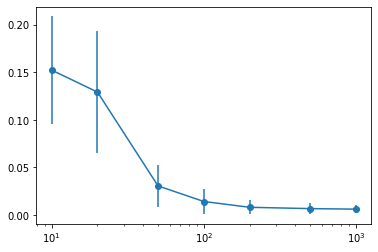

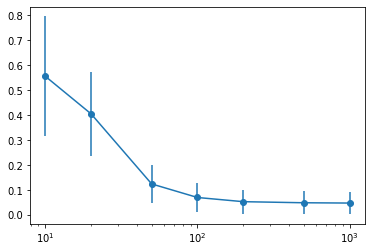

In [29]:
plt.errorbar(n_train_traj, NF_mean, yerr=NF_std, marker = 'o')
plt.xscale('log')
plt.show()

plt.errorbar(n_train_traj, max_mean, yerr=max_std, marker = 'o')
plt.xscale('log')
plt.show()